## CLUSTERING

In this notebook we'll perform EDA and Clustering to identify the buyer persona.
First, we'll merge the datasets.


## MERGING


In [1]:
import pandas as pd 

In [2]:
df4= pd.read_csv("C:/Users/devea/Desktop/dataset/parquet.csv")

In [3]:
df4['session meter consume'] = df4['session.meterStop'] - df4['session.meterStart']

In [4]:
print(df4['session meter consume'])

0        40466
1        22744
2        54068
3        27041
4        44872
         ...  
13437     6936
13438    19292
13439        0
13440     4032
13441    20052
Name: session meter consume, Length: 13442, dtype: int64


In [5]:

columns_to_drop = ['endClientName','operatorName','lendeeName','producer','session.averageAmp','session.averagePinTempMinus'
                     ,'session.averagePinTempPlus','session.averagePower','session.analysisComment','session.analysisComment','session.analysisTimestamp',
                     'session.analyzedBy','session.errorCode','session.car','session.distributorName','session.distributorId','session.hasOcmfData','session.isNoStopTracked', 'session.hycErrorcode','session.physicalPosition',
                     'session.peakAmp','session.peakPinTempMinus','session.peakPower','session.peakPinTempPlus', 'session.producer',
                     'session.reason','session.stackErrorCount','session.stackErrorsArrayText','session.startU', 'session.sessionErrorsDb',
                     'session.sessionLiveViewEnabled', 'session.serialNumber', 'session.stopU', 'session.transactionIdNew' ,
                     'carChargeParameter','carChargeParameter.batteryCapacity' ,'session.type' ,'session.maxPinDelta', 'locationCountry','distributorName',
                     'corporationName','hasOcmfData','session.falsePositive','session.logRequestExecuted','session.logRequestResult','session.softwareVersion',
                     'session.timestampUncertain','carChargeParameter.excludeFromStatistics'
]
df4_cleaned = df4.drop(columns_to_drop, axis=1)


In [6]:
df4_cleaned

,serialNumber,gpsLat,gpsLong,locationStreet,locationZipCode,locationTown,locationProvince,locationUpdateNote,evId,type,...,session.socStart,session.socStop,session.chargingSessionId,session.position,carChargeParameter.carChargeParameterId,carChargeParameter.voltage,carChargeParameter.maxPower,carChargeParameter.current,carChargeParameter.car,session meter consume
0,22BZ3013B,43.075102,13.842823,Autostrada Adriatica 290,63828.0,Provincia di Fermo,Marche,NaN,5.410658e+11,CCS2_400,...,37,87,69206115,2,7464.0,408.0,0.0,500.0,Skoda Enyaq IV / VW ID.Buzz / Cupra Born / ID4...,40466
1,21BZ3104B,44.518340,11.214320,Autostrada Adriatica 741,40069.0,Bologna,Emilia-Romagna,NaN,7.505105e+13,CCS2_400,...,48,78,69206119,2,10.0,421.4,0.0,200.0,Kia e-Niro,22744
2,22BZ3020B,41.891882,12.758657,Area di servizio Prenestina est,10.0,Città Metropolitana di Roma,Lazio,NaN,1.498784e+14,CCS2_400,...,28,91,69206142,1,10865.0,475.0,0.0,500.0,unknown,54068
3,23BZ1042B,46.206436,13.048325,NaN,NaN,NaN,NaN,CellTower localization!,7.937615e+13,CCS2_400,...,47,80,69206195,1,7464.0,408.0,0.0,500.0,Skoda Enyaq IV / VW ID.Buzz / Cupra Born / ID4...,27041
4,22BZ0659B,45.729300,9.029120,Autostrada dei Laghi km 29,22071.0,Provincia di Como,Lombardia,NaN,1.036783e+11,CCS2_400,...,23,83,69206222,2,1985.0,430.0,129000.0,300.0,Mercedes EQV / EQB,44872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13437,22BZ2234B,45.461680,9.276506,Viale Enrico Forlanini 1,20134.0,Milano,Lombardia,NaN,2.421853e+14,CCS2_400,...,85,94,76056782,2,9719.0,423.0,326000.0,799.0,Tesla Model Y / 3 LR,6936
13438,22BZ3011B,45.676823,12.172375,NaN,NaN,NaN,NaN,CellTower localization!,2.090301e+11,CCS2_400,...,38,67,76056810,1,3117.0,347.0,250000.0,500.0,BMW iX1,19292
13439,22BZ5318B,45.624755,8.712067,MXP T1 - arrivi 2000,21010.0,Province of Varese,Lombardy,"45.62475539738236, 8.712067013491533",NaN,CCS2_400,...,0,0,76056815,2,26.0,0.0,0.0,0.0,NotTransmitted,0
13440,22BZ5355B,41.849835,12.732820,Via Casilina 23,40.0,Laghetto,Lazio,NaN,2.248851e+14,CCS2_400,...,87,100,76056903,1,33.0,420.0,126000.0,300.0,Mercedes EQC 400,4032


In [7]:
df4_cleaned = df4_cleaned.drop(columns = 'stackOszis')

In [8]:
df4_cleaned.dtypes

serialNumber                                object
gpsLat                                     float64
gpsLong                                    float64
locationStreet                              object
locationZipCode                            float64
locationTown                                object
locationProvince                            object
locationUpdateNote                          object
evId                                       float64
type                                        object
physicalPosition                           float64
cableLength                                  int64
chargingSessionGraphData                    object
stackErrors                                 object
chargingSessionErrors                       object
session.creationTime                        object
session.carChargeParameterId               float64
session.end                                 object
session.evId                               float64
session.meterStart             

In [9]:
print(df4_cleaned['chargingSessionGraphData'].apply(type))

0        <class 'str'>
1        <class 'str'>
2        <class 'str'>
3        <class 'str'>
4        <class 'str'>
             ...      
13437    <class 'str'>
13438    <class 'str'>
13439    <class 'str'>
13440    <class 'str'>
13441    <class 'str'>
Name: chargingSessionGraphData, Length: 13442, dtype: object


In [10]:
df1 = pd.read_csv('C:/Users/devea/Desktop/dataset/new/pdr_locations_cleaned_task1.csv')
df2 = pd.read_csv('C:/Users/devea/Desktop/dataset/new/hypercarge_locations_task1.csv')
df3 = pd.read_csv('C:/Users/devea/Desktop/dataset/new/cdr_cleaned_task1.csv')

In [11]:
print("Columns in df1:", df1.columns)
print("Columns in df2:", df2.columns)
print("Columns in df3:", df3.columns)
print("Columns in common_df:", df4_cleaned.columns)

Columns in df1: Index(['connector_id', 'connector_station_id', 'connector_evse_id',
       'connector_status', 'station_name', 'station_address',
       'station_postal_code', 'station_city', 'station_coordinates_lat',
       'station_coordinates_lon', 'station_brand', 'station_type_status',
       'number_of_sessions', 'energy', 'cost', 'max_electric_power',
       'max_voltage', 'power_type_id', 'plug_type_id', 'plug_format_id',
       'station_installation_year', 'station_installation_month',
       'station_installation_week', 'month_of_session', 'year_of_session'],
      dtype='object')
Columns in df2: Index(['Unnamed: 0', 'chargerId', 'gpsLat', 'gpsLong', 'numberStacks',
       'chassis', 'doorContactSwitch', 'chargePointIdentity', 'deadManSwitch',
       'telemetrySave', 'hymaintInstalled', 'lastSignOfLife',
       'status_errorcode', 'status_hycErrorCode', 'status_status',
       'simActivated', 'isActive', 'softwareVersion', 'distributorId',
       'corporationId', 'distributo

In [12]:
common_columns = set(df1.columns).intersection(df3.columns)

print("Common columns across all datasets:", common_columns)

Common columns across all datasets: {'station_city', 'station_name', 'energy', 'station_address'}


In [13]:
common_columns = set(df2.columns).intersection(df3.columns)

print("Common columns across all datasets:", common_columns)

Common columns across all datasets: {'chargePointIdentity'}


In [14]:
common_columns = set(df2.columns).intersection(df4_cleaned.columns)

print("Common columns across all datasets:", common_columns)

Common columns across all datasets: {'gpsLat', 'gpsLong'}


In [32]:
merged_df1 = pd.merge(df1, df3, on='energy', how='inner')
merged_df2 = pd.merge(df4_cleaned, df2, on='gpsLat', how='inner')
merged_df3 = pd.merge(merged_df2,merged_df1, on='chargePointIdentity',how='outer')

In [33]:
df_all = merged_df3

In [34]:
df_all

,serialNumber,gpsLat,gpsLong_x,locationStreet,locationZipCode,locationTown,locationProvince,locationUpdateNote,evId,type,...,charging_power,station_name_y,station_city_y,station_address_y,date,start_time,end_time,revenues,total_time,plug_type
0,22BZ0558B,45.32151,9.37723,Autostrada del Sole,20070.0,Città Metropolitana di Milano,Lombardia,NaN,1.681452e+14,CCS2_400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22BZ0558B,45.32151,9.37723,Autostrada del Sole,20070.0,Città Metropolitana di Milano,Lombardia,NaN,5.410658e+11,CCS2_400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22BZ0558B,45.32151,9.37723,Autostrada del Sole,20070.0,Città Metropolitana di Milano,Lombardia,NaN,5.410658e+11,CCS2_400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22BZ0558B,45.32151,9.37723,Autostrada del Sole,20070.0,Città Metropolitana di Milano,Lombardia,NaN,2.599220e+14,CCS2_400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22BZ0558B,45.32151,9.37723,Autostrada del Sole,20070.0,Città Metropolitana di Milano,Lombardia,NaN,1.681452e+14,CCS2_400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18708,24BZ1696B,43.09410,11.78060,NaN,NaN,NaN,NaN,CellTower localization!,2.777834e+14,CCS2_400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18709,24BZ1696B,43.09410,11.78060,NaN,NaN,NaN,NaN,CellTower localization!,2.777834e+14,CCS2_400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18710,24BZ1696B,43.09410,11.78060,NaN,NaN,NaN,NaN,CellTower localization!,2.671762e+13,CCS2_400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18711,24BZ1696B,43.09410,11.78060,NaN,NaN,NaN,NaN,CellTower localization!,2.671762e+13,CCS2_400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
missing_percentage = (df_all.isnull().sum() / len(df_all)) * 100
missing_percentage

serialNumber       23.352749
gpsLat             23.352749
gpsLong_x          23.352749
locationStreet     44.145781
locationZipCode    44.145781
                     ...    
start_time         76.647251
end_time           76.647251
revenues           76.647251
total_time         76.647251
plug_type          76.647251
Length: 107, dtype: float64

In [36]:
df_all1 = df_all.drop_duplicates()

In [37]:
df_all1

,serialNumber,gpsLat,gpsLong_x,locationStreet,locationZipCode,locationTown,locationProvince,locationUpdateNote,evId,type,...,charging_power,station_name_y,station_city_y,station_address_y,date,start_time,end_time,revenues,total_time,plug_type
0,22BZ0558B,45.32151,9.37723,Autostrada del Sole,20070.0,Città Metropolitana di Milano,Lombardia,NaN,1.681452e+14,CCS2_400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22BZ0558B,45.32151,9.37723,Autostrada del Sole,20070.0,Città Metropolitana di Milano,Lombardia,NaN,5.410658e+11,CCS2_400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22BZ0558B,45.32151,9.37723,Autostrada del Sole,20070.0,Città Metropolitana di Milano,Lombardia,NaN,5.410658e+11,CCS2_400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22BZ0558B,45.32151,9.37723,Autostrada del Sole,20070.0,Città Metropolitana di Milano,Lombardia,NaN,2.599220e+14,CCS2_400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22BZ0558B,45.32151,9.37723,Autostrada del Sole,20070.0,Città Metropolitana di Milano,Lombardia,NaN,1.681452e+14,CCS2_400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18708,24BZ1696B,43.09410,11.78060,NaN,NaN,NaN,NaN,CellTower localization!,2.777834e+14,CCS2_400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18709,24BZ1696B,43.09410,11.78060,NaN,NaN,NaN,NaN,CellTower localization!,2.777834e+14,CCS2_400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18710,24BZ1696B,43.09410,11.78060,NaN,NaN,NaN,NaN,CellTower localization!,2.671762e+13,CCS2_400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18711,24BZ1696B,43.09410,11.78060,NaN,NaN,NaN,NaN,CellTower localization!,2.671762e+13,CCS2_400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
threshold = len(df_all) * 0.3
df_final = df_all.dropna(axis=1,thresh= threshold)

In [ ]:
df_final

In [40]:
df_final=df_final.drop(['stackErrors','chargingSessionErrors'], axis=1)

In [41]:
df_flattened = pd.json_normalize(df_all['chargingSessionGraphData'])


In [43]:
data_sample = df_final.iloc[[0, 1]]
data_sample.to_csv('data_sample.csv', index=False)

## VISUALIZATIONS

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

We can start by visualizing the towns with the highest number of sessions.

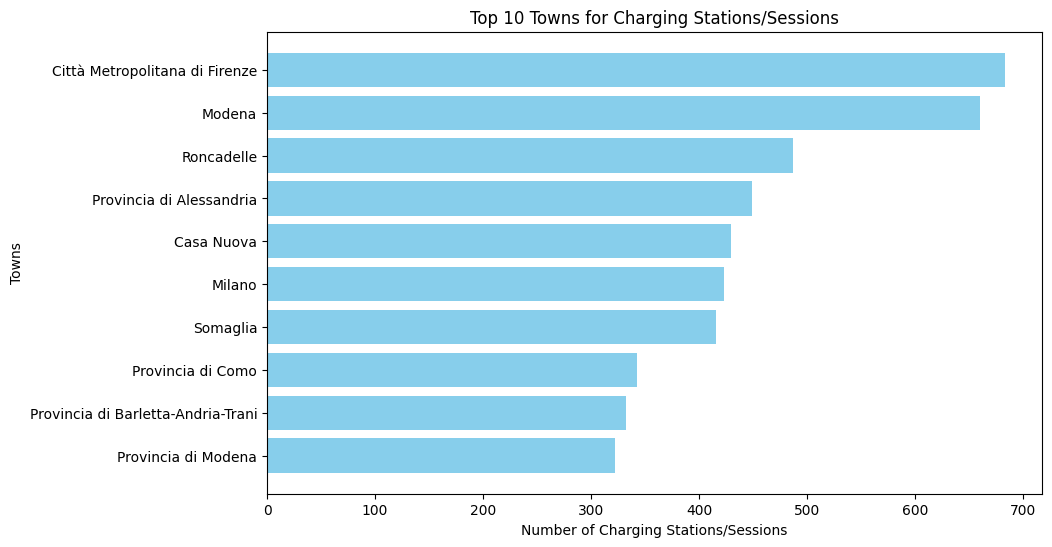

In [47]:
town_column = 'locationTown'  
town_data = df_final.groupby(town_column).size().reset_index(name='count')

# top 10 towns
top_10_towns = town_data.sort_values(by='count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_towns[town_column], top_10_towns['count'], color='skyblue')
plt.xlabel('Number of Charging Sessions')
plt.ylabel('Towns')
plt.title('Top 10 Towns for Charging Sessions')
plt.gca().invert_yaxis()  
plt.show()

Then, we move on to visualizing session duration and energy consumption.

Average Charging Duration: 0.41 hours
Total Energy Consumed: 427994884.00 kWh


C:\Users\devea\AppData\Local\Temp\ipykernel_5424\4213558590.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[start_time_column] = pd.to_datetime(df_final[start_time_column])
C:\Users\devea\AppData\Local\Temp\ipykernel_5424\4213558590.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[end_time_column] = pd.to_datetime(df_final[end_time_column])
C:\Users\devea\AppData\Local\Temp\ipykernel_5424\4213558590.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

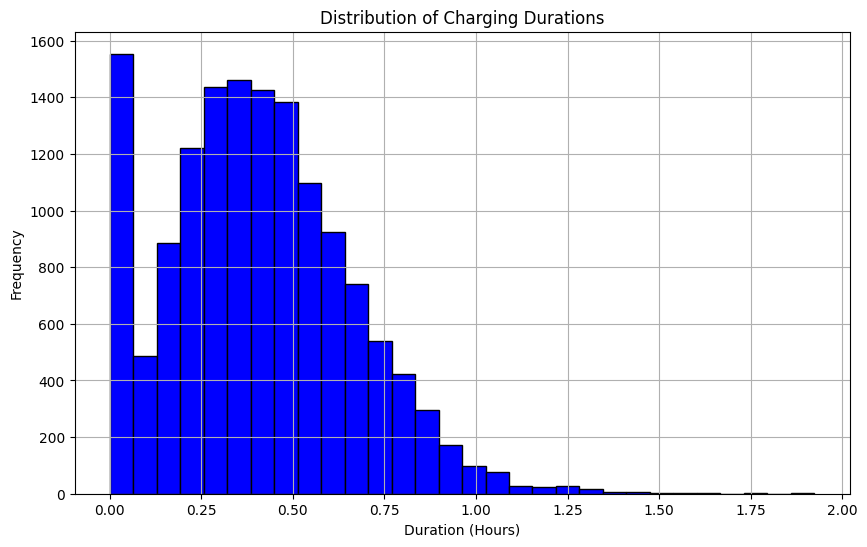

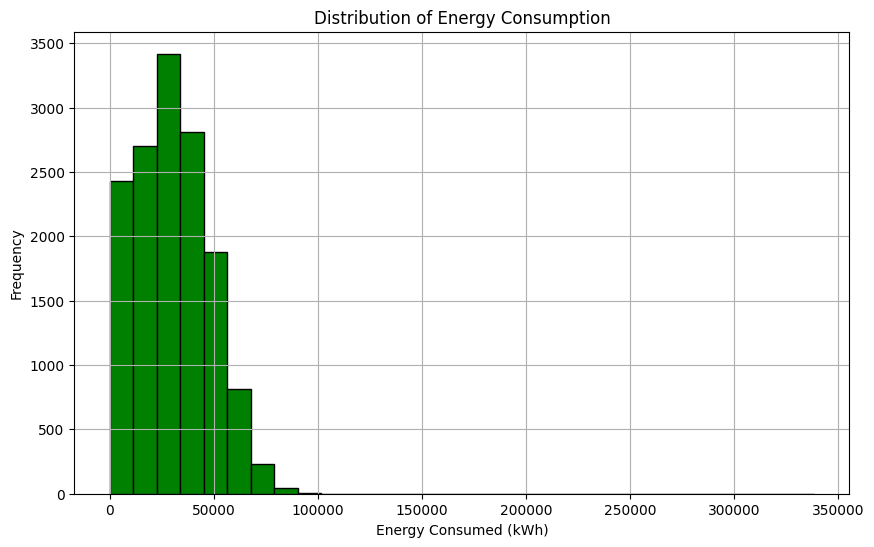

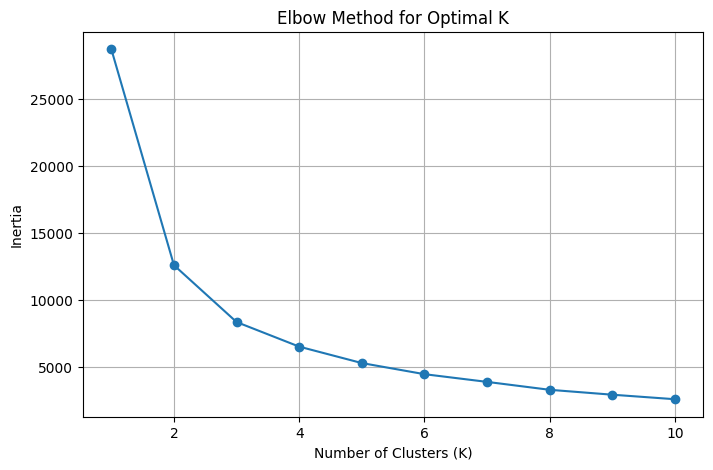

In [ ]:
start_time_column = 'session.start'  
end_time_column = 'session.end'  
energy_consumed_column = 'session meter consume' 

df_final[start_time_column] = pd.to_datetime(df_final[start_time_column])
df_final[end_time_column] = pd.to_datetime(df_final[end_time_column])

df_final['charging_duration_hours'] = (df_final[end_time_column] - df_final[start_time_column]).dt.total_seconds() / 3600

average_duration = df_final['charging_duration_hours'].mean()
total_energy_consumed = df_final[energy_consumed_column].sum()

print(f"Average Charging Duration: {average_duration:.2f} hours")
print(f"Total Energy Consumed: {total_energy_consumed:.2f} kWh")

plt.figure(figsize=(10, 6))
plt.hist(df_final['charging_duration_hours'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Charging Durations')
plt.xlabel('Duration (Hours)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df_final[energy_consumed_column], bins=30, color='green', edgecolor='black')
plt.title('Distribution of Energy Consumption')
plt.xlabel('Energy Consumed (kWh)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Popular time


C:\Users\devea\AppData\Local\Temp\ipykernel_5424\632086540.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[start_time_column] = pd.to_datetime(df_final[start_time_column])
C:\Users\devea\AppData\Local\Temp\ipykernel_5424\632086540.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Month'] = df_final[start_time_column].dt.month
C:\Users\devea\AppData\Local\Temp\ipykernel_5424\632086540.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

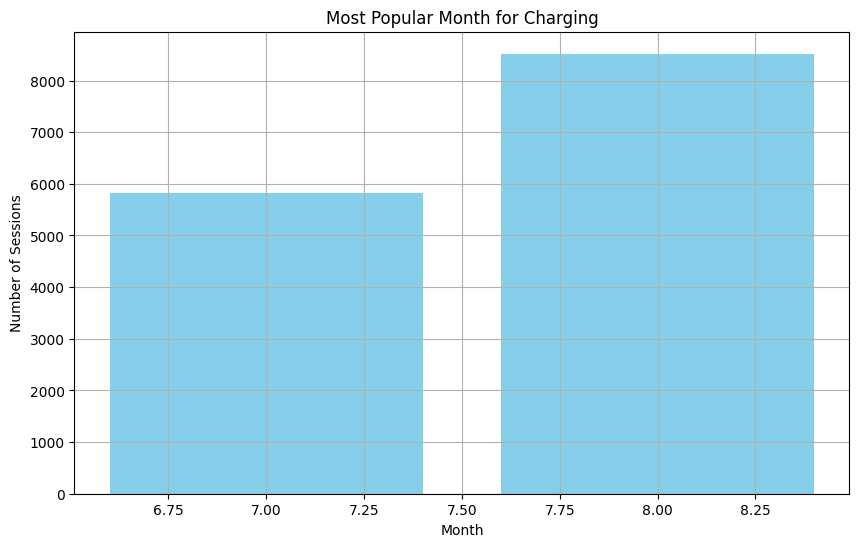

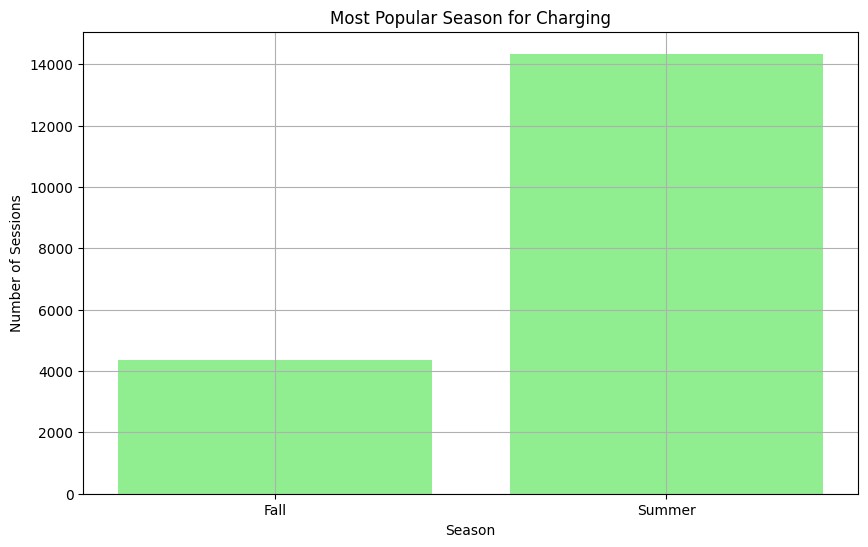

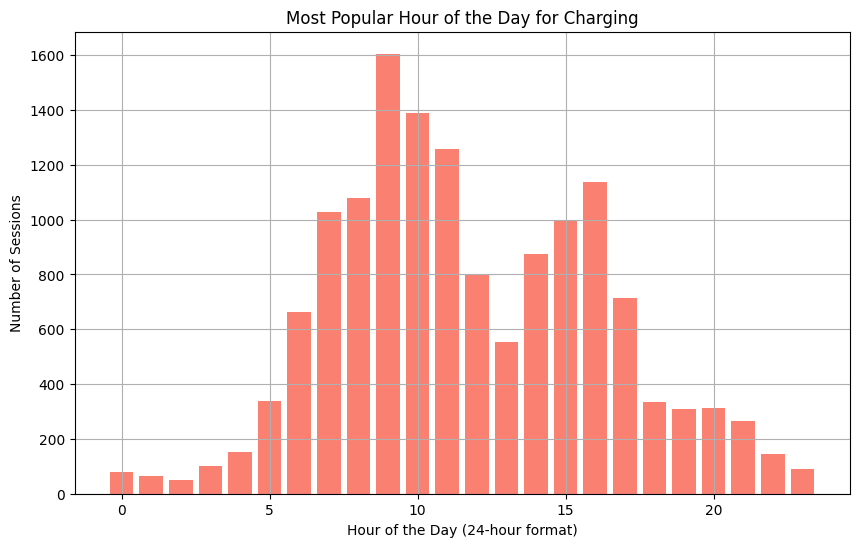

C:\Users\devea\AppData\Local\Temp\ipykernel_5424\632086540.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Season_numeric'] = df_final['Season'].map({'Winter': 0, 'Spring': 1, 'Summer': 2, 'Fall': 3})


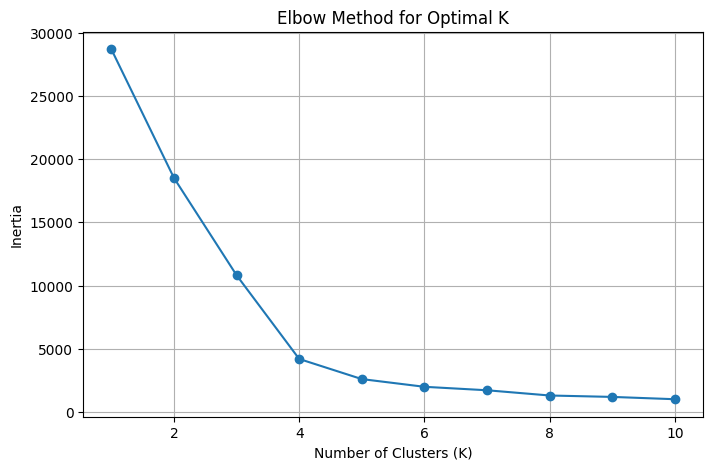

In [80]:

start_time_column = 'session.start'  

df_final[start_time_column] = pd.to_datetime(df_final[start_time_column])

df_final['Month'] = df_final[start_time_column].dt.month
df_final['Hour'] = df_final[start_time_column].dt.hour

# Define seasons based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_final['Season'] = df_final['Month'].apply(get_season)

month_popularity = df_final.groupby('Month').size().reset_index(name='count')
season_popularity = df_final.groupby('Season').size().reset_index(name='count')
hour_popularity = df_final.groupby('Hour').size().reset_index(name='count')

# Most popular month
plt.figure(figsize=(10, 6))
plt.bar(month_popularity['Month'], month_popularity['count'], color='skyblue')
plt.title('Most Popular Month for Charging')
plt.xlabel('Month')
plt.ylabel('Number of Sessions')
plt.grid(True)
plt.show()

#  Most popular season
plt.figure(figsize=(10, 6))
plt.bar(season_popularity['Season'], season_popularity['count'], color='lightgreen')
plt.title('Most Popular Season for Charging')
plt.xlabel('Season')
plt.ylabel('Number of Sessions')
plt.grid(True)
plt.show()

#  Most popular hour
plt.figure(figsize=(10, 6))
plt.bar(hour_popularity['Hour'], hour_popularity['count'], color='salmon')
plt.title('Most Popular Hour of the Day for Charging')
plt.xlabel('Hour of the Day (24-hour format)')
plt.ylabel('Number of Sessions')
plt.grid(True)
plt.show()

df_final['Season_numeric'] = df_final['Season'].map({'Winter': 0, 'Spring': 1, 'Summer': 2, 'Fall': 3})




##  CLUSTERING ON SESSION DURATION AND ENERGY CONSUMPTION 

In [ ]:

clustering_data = df_final[['TotalChargingTime', 'estimatedEnergy']].dropna()


inertia = []
for i in range(1, 11):  # Testing for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(clustering_data)
    inertia.append(kmeans.inertia_)

# Plot the inertia values to visualize the elbow point
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


In [ ]:
df_cleaned = df_final.dropna(subset=['TotalChargingTime', 'estimatedEnergy'])


kmeans = KMeans(n_clusters=3, random_state=42)
df_cleaned['session_cluster'] = kmeans.fit_predict(df_cleaned[['TotalChargingTime', 'estimatedEnergy']])


cluster_centers = kmeans.cluster_centers_


plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned['TotalChargingTime'], df_cleaned['estimatedEnergy'], c=df_cleaned['session_cluster'], cmap='viridis', alpha=0.6)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', label="Cluster Centers")
plt.title("K-means Clustering: Session Duration vs Estimated Energy Consumption")
plt.xlabel("Session Duration (hours)")
plt.ylabel("Estimated Energy Consumption (kWh)")
plt.legend()
plt.show()


cluster_centers, df_cleaned.groupby('session_cluster')[['TotalChargingTime', 'estimatedEnergy']].mean()


## Cluster 0 (Short Sessions with Low Energy Consumption):
- Average Session Duration: Likely represents sessions with shorter durations, as they have lower average session times compared to other clusters.

- Average Estimated Energy Consumption: Correspondingly, these sessions use lower amounts of energy, meaning they are either brief sessions or those with low charging demands.

## Cluster 1 (Medium-Length Sessions with Moderate Energy Consumption):
- Average Session Duration: These sessions fall in the middle range of session times. They are neither too short nor extremely long.

- Average Estimated Energy Consumption: These sessions show moderate energy consumption, indicating they might be standard charging sessions, balancing both time and energy usage.

## Cluster 2 (Long Sessions with High Energy Consumption):
- Average Session Duration: This cluster represents the longest sessions, implying users are likely charging their vehicles for longer periods.

- Average Estimated Energy Consumption: These sessions also consume more energy, reflecting the fact that longer charging times generally correspond to higher energy demands.


In summary:

- Cluster 0: Likely represents _quick, low-energy_ sessions.
- Cluster 1: Represents standard charging sessions with _moderate_ times and energy consumption.
- Cluster 2: Represents _long, high-energy_ charging sessions.

## CLUSTERING ON CHARGING BEHAVIOUR AND CAR CHARGING PARAMETERS



/var/folders/nh/9d8r8prn3819gz07wlp9htdw0000gn/T/ipykernel_91055/577293918.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_for_clustering['charging_persona_cluster'] = kmeans_clustering.fit_predict(clustering_features_scaled)


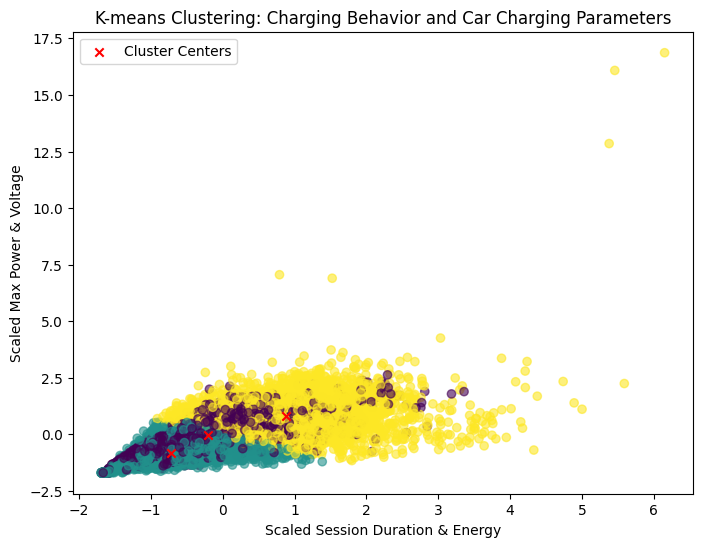

array([[-0.20496873, -0.02075793, -0.08857063,  1.23450012, -0.31721398,
         0.94558708],
       [-0.71545837, -0.81573248,  0.07313783, -0.62470321,  0.04741799,
        -0.55813627],
       [ 0.88333709,  0.80773939,  0.01226149, -0.55232239,  0.25122403,
        -0.34610511]])

In [ ]:

clustering_features = df_final[['TotalChargingTime', 'estimatedEnergy', 'AvailableSurroundingChargers_Count', 
                          'carChargeParameter.maxPower', 'carChargeParameter.voltage', 'carChargeParameter.current']]


df_cleaned_for_clustering = df_final.dropna(subset=['TotalChargingTime', 'estimatedEnergy', 
                                              'AvailableSurroundingChargers_Count', 'carChargeParameter.maxPower', 
                                              'carChargeParameter.voltage', 'carChargeParameter.current'])

# Standardize the features to bring them to the same scale
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features.loc[df_cleaned_for_clustering.index])

# Perform K-means clustering with 3 clusters
kmeans_clustering = KMeans(n_clusters=3, random_state=42)
df_cleaned_for_clustering['charging_persona_cluster'] = kmeans_clustering.fit_predict(clustering_features_scaled)

# Align the clusters with the original dataframe
df_final['charging_persona_cluster'] = df_cleaned_for_clustering['charging_persona_cluster']

# Show the cluster centers
cluster_centers = kmeans_clustering.cluster_centers_

# Visualize the results of clustering (using two principal components for visualization)
plt.figure(figsize=(8, 6))
plt.scatter(clustering_features_scaled[:, 0], clustering_features_scaled[:, 1], c=df_cleaned_for_clustering['charging_persona_cluster'], cmap='viridis', alpha=0.6)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', label="Cluster Centers")
plt.title("K-means Clustering: Charging Behavior and Car Charging Parameters")
plt.xlabel("Scaled Session Duration & Energy")
plt.ylabel("Scaled Max Power & Voltage")
plt.legend()
plt.show()

# Show the cluster centers
cluster_centers


- Persona 1 (Yellow): Likely represents high-power, frequent chargers, possibly commercial users, long-trip EV users, or users with large EV batteries.

- Persona 2 (Turquoise): Represents standard EV owners, who charge for moderate durations and with moderate power requirements.

- Persona 3 (Purple): Likely represents occasional or home charger users, with short sessions and lower power needs.